# Q1. Explain the concept of homogeneity and completeness in clustering evaluation. How are they calculated?

In [49]:
from sklearn.metrics import homogeneity_completeness_v_measure , homogeneity_score , completeness_score
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

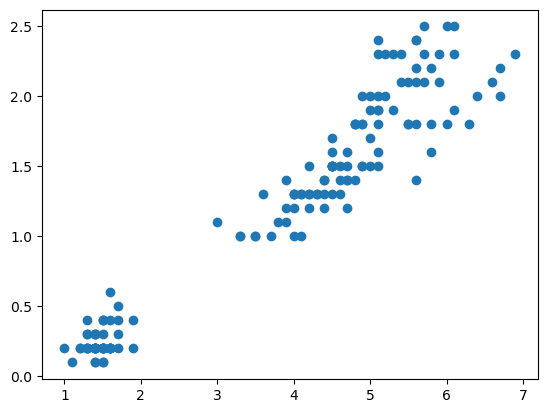

In [50]:
from sklearn.datasets import load_iris

datasets = load_iris()

import pandas as pd

df = pd.DataFrame(datasets.data , columns=datasets.feature_names)
df.drop('sepal length (cm)', axis=1 , inplace=True)
df.drop('sepal width (cm)' , axis=1 , inplace=True)
df.head()

plt.scatter(df['petal length (cm)'] , df['petal width (cm)'])

In [51]:
cluster = KMeans(n_clusters=2)

cluster.fit(df)

pre_label = cluster.fit_predict(df)

In [52]:
true_labels = datasets.target

In [53]:
homogeneity_score(pre_label , true_labels)

0.9490204434010505

In [54]:
completeness_score(pre_label , true_labels)

0.5537492887432671

# Q2. What is the V-measure in clustering evaluation? How is it related to homogeneity and completeness?

In [55]:
from sklearn.metrics import v_measure_score

In [56]:
v_measure_score(true_labels , pre_label)

0.6994010915914346

The V-measure score ranges from 0 to 1, with a higher score indicating better performance. A V-measure score of 1 means that the clustering algorithm has perfectly clustered the data, with both homogeneity and completeness scores of 1.

V-measure is a good choice for clustering evaluation because it addresses some of the limitations of homogeneity and completeness. For example, homogeneity and completeness can be high even for a poor clustering solution, if the clusters are small and isolated. V-measure, on the other hand, penalizes clusters that are too small.

Relationship between V-measure, homogeneity, and completeness

V-measure is related to homogeneity and completeness in the following ways:

A high V-measure score requires both high homogeneity and high completeness.
A low V-measure score can be caused by either low homogeneity or low completeness.
V-measure is more sensitive to completeness than homogeneity.
This means that V-measure gives more weight to completeness when calculating the overall score. This is because completeness is more important for many real-world clustering applications. For example, in a customer segmentation task, it is more important to ensure that all customers in a segment are from the same target group, even if some customers from other target groups are also in the segment.



# Q3. How is the Silhouette Coefficient used to evaluate the quality of a clustering result? What is the range of its values?

In [57]:
from sklearn.metrics import silhouette_score

In [58]:
silhouette_score(df , pre_label)

0.7653904101258123

The Silhouette Coefficient is a metric for evaluating the quality of a clustering result. It measures how well each data point is assigned to its cluster, by considering the distance between the data point and other data points in its cluster, as well as the distance between the data point and data points in other clusters.

The Silhouette Coefficient is calculated for each data point in the dataset, and the average Silhouette Coefficient is then used to evaluate the overall quality of the clustering. The Silhouette Coefficient can range from -1 to 1:

A Silhouette Coefficient of 1 indicates that the data point is very well-assigned to its cluster, and that it is far away from data points in other clusters.
A Silhouette Coefficient of 0 indicates that the data point is indifferently assigned to its cluster, and that it is equally close to data points in other clusters.
A Silhouette Coefficient of -1 indicates that the data point is very poorly-assigned to its cluster, and that it is closer to data points in other clusters than to data points in its own cluster.
A higher Silhouette Coefficient score indicates better clustering results. A Silhouette Coefficient score of 0.5 or higher is generally considered to be good, and a Silhouette Coefficient score of 0.7 or higher is considered to be excellent.

How to use the Silhouette Coefficient to evaluate clustering results

To use the Silhouette Coefficient to evaluate clustering results, you can follow these steps:

Calculate the Silhouette Coefficient for each data point in the dataset.
Calculate the average Silhouette Coefficient for the dataset.
Interpret the average Silhouette Coefficient score:
A score of 0.5 or higher is generally considered to be good.
A score of 0.7 or higher is considered to be excellent.
A score of less than 0.5 indicates that the clustering results could be improved.


# Q4. How is the Davies-Bouldin Index used to evaluate the quality of a clustering result? What is the range of its values?

In [59]:
from sklearn.metrics import davies_bouldin_score

davies_bouldin_score(df , pre_label)

0.26490616966729874

The Davies-Bouldin Index (DBI) is a metric for evaluating the quality of a clustering result. It measures the compactness of the clusters and the separation between the clusters. The DBI is calculated as the average ratio of the within-cluster distance to the between-cluster distance for all pairs of clusters.

The DBI can range from 0 to infinity. A lower DBI score indicates better clustering results. A DBI score of less than 1 is generally considered to be good, and a DBI score of less than 0.5 is considered to be excellent.

How to use the Davies-Bouldin Index to evaluate clustering results

To use the Davies-Bouldin Index to evaluate clustering results, you can follow these steps:

Calculate the Davies-Bouldin Index for the clustering result.
Interpret the Davies-Bouldin Index score:
A score of less than 1 is generally considered to be good.
A score of less than 0.5 is considered to be excellent.
A score of greater than 1 indicates that the clustering results could be improved.


# Q5. Can a clustering result have a high homogeneity but low completeness? Explain with an example.

Yes, a clustering result can have a high homogeneity but low completeness. This means that the clusters are very pure, with most data points in each cluster belonging to the same class, but some classes are not completely captured by any cluster.

One example of this is a clustering result of the Iris dataset where the clusters are formed based on the petal length and width. The petal length and width are two highly correlated features, so the clusters formed using these features will be very pure. However, it is possible that some of the Iris flowers will be misclassified, resulting in a low completeness score.

Another example is a clustering result of a customer segmentation task where the clusters are formed based on the customer's purchase history. The purchase history data is typically very high-dimensional and complex, so it is possible that the clusters formed using this data will be pure, but not complete.

Example:

Suppose we have a dataset of images of cats and dogs, and we want to use a clustering algorithm to group the images into two clusters: cats and dogs. The clustering algorithm might find two clusters, but one of the clusters might contain a few dog images. This would result in a high homogeneity score (because most of the images in each cluster are cats or dogs), but a low completeness score (because not all of the dog images are in the dog cluster).

How to improve completeness without sacrificing homogeneity

There are a few things you can do to improve the completeness of a clustering result without sacrificing homogeneity:

Use a clustering algorithm that is designed to produce complete clusters.
Use more features in the clustering algorithm. This will help the clustering algorithm to better distinguish between the different classes.
Tune the clustering algorithm parameters. For example, you might need to increase the number of clusters or decrease the clustering threshold.
Use a post-processing step to merge or split clusters. This can be useful for correcting misclassified data points or for splitting large clusters into smaller, more homogeneous clusters.
It is important to note that there is no one-size-fits-all solution for improving the completeness of a clustering result without sacrificing homogeneity. The best approach will depend on the specific dataset and clustering algorithm that you are using.



# Q6. How can the V-measure be used to determine the optimal number of clusters in a clustering algorithm?

In [60]:
from sklearn.metrics import v_measure_score

In [61]:
v_measure_score(true_labels , pre_label)

0.6994010915914346


The V-measure can be used to determine the optimal number of clusters in a clustering algorithm by calculating the V-measure score for different numbers of clusters and choosing the number of clusters with the highest V-measure score.

Here is a step-by-step guide on how to use the V-measure to determine the optimal number of clusters in a clustering algorithm:

Choose a range of values for the number of clusters, such as from 2 to 10 clusters.
For each number of clusters, train the clustering algorithm on the data and calculate the V-measure score.
Choose the number of clusters with the highest V-measure score.
It is important to note that the V-measure score can be sensitive to the choice of clustering algorithm and clustering parameters. Therefore, it is important to experiment with different clustering algorithms and parameters to find the best combination for your dataset.

Example:

Suppose we have a dataset of images of cats and dogs, and we want to use a clustering algorithm to group the images into two clusters: cats and dogs. We can use the V-measure to determine the optimal number of clusters by following these steps:

Choose a range of values for the number of clusters, such as from 2 to 10 clusters.
For each number of clusters, train a k-means clustering algorithm on the data and calculate the V-measure score.
Choose the number of clusters with the highest V-measure score.

# Q7. What are some advantages and disadvantages of using the Silhouette Coefficient to evaluate a clustering result?

Advantages of using the Silhouette Coefficient to evaluate a clustering result:

It is easy to calculate and interpret.
It is sensitive to both the compactness of the clusters and the separation between the clusters.
It is widely used in practice, so it is easy to compare your results to others.
Disadvantages of using the Silhouette Coefficient to evaluate a clustering result:

It can be computationally expensive to calculate for large datasets.
It is sensitive to outliers.
It can be difficult to interpret in cases where the clusters are not well-defined.
Overall, the Silhouette Coefficient is a good choice for evaluating the quality of a clustering result, but it is important to be aware of its limitations.

Here are some additional tips for using the Silhouette Coefficient effectively:

Use the Silhouette Coefficient in conjunction with other clustering evaluation metrics, such as the Davies-Bouldin Index and the V-measure score. This will give you a more complete picture of the quality of the clustering.
Consider using a sampling technique to calculate the Silhouette Coefficient for large datasets. This can reduce the computational cost without sacrificing too much accuracy.
Be careful when interpreting the Silhouette Coefficient for datasets with outliers. Outliers can artificially lower the Silhouette Coefficient score.
If the Silhouette Coefficient score is low, try to identify the reasons why. This may help you to improve the clustering algorithm or to collect better data.

# Q8. What are some limitations of the Davies-Bouldin Index as a clustering evaluation metric? How can they be overcome?

The Davies-Bouldin Index (DBI) is a popular clustering evaluation metric, but it has some limitations. Here are some of the most important limitations:

The DBI is sensitive to outliers. Outliers can artificially increase the DBI score, even if the clustering is good.
The DBI assumes that the clusters are spherical and have the same size and density. This assumption is often violated in real-world data.
The DBI does not take into account the structure or distribution of the data, such as clusters within clusters or non-linear relationships.
These limitations can be overcome in the following ways:

To reduce the sensitivity of the DBI to outliers, you can use a pre-processing step to remove outliers from the data. You can also use a robust clustering algorithm that is less sensitive to outliers.
To address the assumption that the clusters are spherical and have the same size and density, you can use a clustering algorithm that does not make this assumption. For example, you can use a density-based clustering algorithm, such as DBSCAN.
To take into account the structure or distribution of the data, you can use a clustering algorithm that is designed to handle these types of data. For example, you can use a hierarchical clustering algorithm, which can identify clusters within clusters.
In addition to the above, here are some other tips for using the DBI effectively:

Use the DBI in conjunction with other clustering evaluation metrics, such as the Silhouette Coefficient and the V-measure score. This will give you a more complete picture of the quality of the clustering.
Be careful when interpreting the DBI score for datasets with outliers. Outliers can artificially increase the DBI score.
If the DBI score is high, try to identify the reasons why. This may help you to improve the clustering algorithm or to collect better data.
Overall, the DBI is a useful clustering evaluation metric, but it is important to be aware of its limitations and to use it in conjunction with other metrics.

# Q9. What is the relationship between homogeneity, completeness, and the V-measure? Can they have different values for the same clustering result?

Homogeneity measures how pure the clusters are, meaning how much each cluster contains data points from the same class. A clustering algorithm with high homogeneity will have clusters that are mostly composed of data points from the same class, and very few data points from other classes.

Completeness measures how well the clustering algorithm has captured all of the data points in each class. A clustering algorithm with high completeness will have clusters that contain all of the data points from each class.

The V-measure is a harmonic mean of homogeneity and completeness. It is a measure of how well the clustering algorithm has grouped the data points into clusters, taking into account both the purity of the clusters and the coverage of the data points.

Can homogeneity, completeness, and the V-measure have different values for the same clustering result?

Yes, homogeneity, completeness, and the V-measure can have different values for the same clustering result. This is because the three metrics measure different aspects of the clustering result.

For example, a clustering result may have high homogeneity and low completeness, meaning that the clusters are very pure, but some of the data points are not in any cluster. Or, a clustering result may have low homogeneity and high completeness, meaning that all of the data points are in a cluster, but the clusters are not very pure.

The V-measure takes into account both homogeneity and completeness, so it will be higher for clustering results that have both high homogeneity and high completeness.

Example

Suppose we have a clustering result of the Iris dataset where the clusters are formed based on the petal length and width. The petal length and width are two highly correlated features, so the clusters formed using these features will be very pure (high homogeneity). However, it is possible that some of the Iris flowers will be misclassified, resulting in a lower completeness score.

The V-measure score for this clustering result will be high, because it takes into account both the homogeneity and completeness of the clustering result.

Conclusion

Homogeneity, completeness, and the V-measure are all important metrics for evaluating the quality of a clustering result. They can have different values for the same clustering result, because they measure different aspects of the clustering result. The V-measure is a harmonic mean of homogeneity and completeness, so it is a good overall measure of the quality of the clustering result.



# Q10. How can the Silhouette Coefficient be used to compare the quality of different clustering algorithms on the same dataset? What are some potential issues to watch out for?

To compare the quality of different clustering algorithms on the same dataset using the Silhouette Coefficient, you can follow these steps:

Train each clustering algorithm on the dataset.
Calculate the Silhouette Coefficient score for each clustering algorithm.
Compare the Silhouette Coefficient scores of the different clustering algorithms.
The clustering algorithm with the highest Silhouette Coefficient score is generally considered to be the best clustering algorithm for the dataset.

Potential issues to watch out for:

The Silhouette Coefficient can be sensitive to outliers. Outliers can artificially lower the Silhouette Coefficient score for a clustering algorithm.
The Silhouette Coefficient can be computationally expensive to calculate for large datasets.
The Silhouette Coefficient does not take into account the structure or distribution of the data, such as clusters within clusters or non-linear relationships.
To address these issues, you can:

Use a pre-processing step to remove outliers from the data.
Use a sampling technique to calculate the Silhouette Coefficient for large datasets.
Use a clustering algorithm that is designed to handle the structure or distribution of the data.
Additional tips:

Use the Silhouette Coefficient in conjunction with other clustering evaluation metrics, such as the Davies-Bouldin Index and the V-measure score. This will give you a more complete picture of the quality of the clustering algorithms.
Interpret the Silhouette Coefficient scores with caution, especially if the dataset has outliers or a complex structure or distribution.
Example:

Suppose we have a dataset of images of cats and dogs, and we want to compare the quality of two clustering algorithms: k-means clustering and hierarchical clustering.

We can follow the steps above to compare the two algorithms:

Train the k-means and hierarchical clustering algorithms on the dataset.
Calculate the Silhouette Coefficient score for each clustering algorithm.
Compare the Silhouette Coefficient scores of the two clustering algorithms.
Suppose the Silhouette Coefficient score for the k-means clustering algorithm is 0.85 and the Silhouette Coefficient score for the hierarchical clustering algorithm is 0.90. This indicates that the hierarchical clustering algorithm is a better clustering algorithm for the dataset than the k-means clustering algorithm.

Conclusion

The Silhouette Coefficient is a useful metric for comparing the quality of different clustering algorithms on the same dataset. However, it is important to be aware of the potential issues and to use other clustering evaluation metrics in conjunction with the Silhouette Coefficient.

# Q11. How does the Davies-Bouldin Index measure the separation and compactness of clusters? What are some assumptions it makes about the data and the clusters?


The Davies-Bouldin Index (DBI) measures the separation and compactness of clusters by calculating the ratio of the within-cluster distance to the between-cluster distance for each cluster. The DBI score is then averaged over all clusters to get a single score for the clustering result.

Measuring separation

The between-cluster distance is measured as the minimum distance between the centroids of any two clusters. This means that the DBI rewards clustering algorithms that produce clusters that are well-separated from each other.

Measuring compactness

The within-cluster distance is measured as the average distance of each data point to the centroid of its cluster. This means that the DBI penalizes clustering algorithms that produce clusters that are not very compact.

Assumptions

The DBI makes the following assumptions about the data and the clusters:

The data is distributed in a way that makes it possible to form distinct clusters.
The clusters are spherical and have the same size and density.
The clusters are well-separated from each other.
If these assumptions are not met, the DBI score may not be a reliable measure of the quality of the clustering result.

Example

Suppose we have a dataset of images of cats and dogs, and we want to use the DBI to evaluate the quality of a clustering algorithm. The DBI will calculate the ratio of the within-cluster distance to the between-cluster distance for each cluster. The between-cluster distance will be measured as the minimum distance between the centroids of the cat and dog clusters. The within-cluster distance will be measured as the average distance of each cat image to the centroid of the cat cluster and the average distance of each dog image to the centroid of the dog cluster.

If the clustering algorithm produces clusters that are well-separated and compact, the DBI score will be low. If the clustering algorithm produces clusters that are not well-separated or compact, the DBI score will be high.

Conclusion

The Davies-Bouldin Index is a useful metric for measuring the separation and compactness of clusters. However, it is important to be aware of the assumptions it makes about the data and the clusters.

# Q12. Can the Silhouette Coefficient be used to evaluate hierarchical clustering algorithms? If so, how?

Yes, the Silhouette Coefficient can be used to evaluate hierarchical clustering algorithms. However, it is important to note that the Silhouette Coefficient is not specifically designed for hierarchical clustering algorithms, and there are some special considerations that need to be taken into account when using it to evaluate hierarchical clustering results.

One of the main challenges of using the Silhouette Coefficient to evaluate hierarchical clustering results is that hierarchical clustering algorithms produce a dendrogram, which is a tree-like structure that represents the relationships between the data points. The Silhouette Coefficient is typically calculated for individual clusters, but it is not clear how to define clusters in a dendrogram.

Another challenge is that hierarchical clustering algorithms can produce different clustering results depending on the linkage criterion and cutting height that are used. This means that the Silhouette Coefficient score for a hierarchical clustering result can vary depending on the linkage criterion and cutting height that are chosen.

How to use the Silhouette Coefficient to evaluate hierarchical clustering algorithms:

One way to use the Silhouette Coefficient to evaluate hierarchical clustering algorithms is to calculate the Silhouette Coefficient score for different cuts of the dendrogram. This can be done by repeatedly cutting the dendrogram at different heights and calculating the Silhouette Coefficient score for each resulting clustering. The Silhouette Coefficient score for the hierarchical clustering algorithm can then be defined as the maximum Silhouette Coefficient score for any cut of the dendrogram.

Another way to use the Silhouette Coefficient to evaluate hierarchical clustering algorithms is to use a technique called cluster aggregation. Cluster aggregation is a technique that groups the clusters in a dendrogram into a smaller number of clusters. Once the clusters have been aggregated, the Silhouette Coefficient score can be calculated for the aggregated clusters.

It is important to note that the Silhouette Coefficient score for a hierarchical clustering algorithm is only one measure of the quality of the clustering result. Other measures, such as the Davies-Bouldin Index and the V-measure score, can also be used to evaluate hierarchical clustering results.

Conclusion

The Silhouette Coefficient can be used to evaluate hierarchical clustering algorithms, but it is important to be aware of the challenges and to use other clustering evaluation metrics in conjunction with the Silhouette Coefficient.
